In [1]:
import h5py
import pandas as pd
import numpy as np
import time
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
from sklearn.metrics import roc_curve, accuracy_score, auc, confusion_matrix
from scipy.stats import randint, poisson

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

In [2]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [4]:
X = train[all_variables]
y = train['Truth']

#making a cut of the data
n = 1000
idxs = np.arange(train.shape[0])
idxs_rand = np.random.choice(idxs, size=n)
train_cut = train.iloc[idxs_rand]

X_cut = train_cut[all_variables]
y_cut = train_cut['Truth']

bv = [50, 129, 15, 45, 57, 56, 52, 78, 130, 12, 53] #found using permutation feature importance for different cuts and cross-checking the variables in the top ~15
best_variables = []
for i in range(len(bv)): #converting into variable names
    best_variables.append(all_variables[bv[i]])
    
X_bcut = train_cut[best_variables]

X_best = train[best_variables]

input_train, input_test, truth_train, truth_test = train_test_split(X_best, y, test_size=0.25, random_state=45)

X_real = test[best_variables]

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')
print(f'Shape of X with best variables: {X_best.shape}')
print (f'Shape of X of target data: {X_real.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)
Shape of X with best variables: (162500, 11)
Shape of X of target data: (160651, 11)


# Using Tree Based Methods

Starting with LightGBM Gradient Boosted Decision Tree method:

In [5]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from sklearn.metrics import accuracy_score

start=time.time()

lgb_train = lgb.Dataset(input_train, truth_train)
lgb_eval  = lgb.Dataset(input_test,  truth_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',   #binary outcome, electron or not
    'num_leaves': 6,         
    'verbose':-1,      
    'max_depth':27,          #best parameters based on random search CV results 
    'min_samples_leaf':88
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping(20)])

# Make predictions:
y_score = gbm.predict(input_test, num_iteration=gbm.best_iteration)
y_pred  = [1 if pred > 0.1 else 0 for pred in y_score] #classify whether electron or not
y_real = gbm.predict(X_real, num_iteration=gbm.best_iteration)
# Print the time usage:
end = time.time()
print(f"Time used by LightGBM: {(end-start)*1000:.1f} ms")
accuracy = accuracy_score(truth_test, y_pred) #finds accuracy for comparison with the LGBClassifier method
print(f"Accuracy: {accuracy}")

length = y_pred[y_pred[1] != 0]

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[882]	valid_0's binary_logloss: 0.158641
Time used by LightGBM: 3009.1 ms
Accuracy: 0.9184246153846154


0


In [15]:
results_gbdt = pd.DataFrame(y_real)
results_gbdt.to_csv('solutions/Classification_SW_lgbm_gbdt.txt', sep=',', header=False)

bvdf = pd.DataFrame(best_variables)
bvdf.to_csv('solutions/Classification_SW_lgbm_gbdt_VariableList.txt', sep=',', header=False, index=False)

Using LGBMClassifier:

In [6]:
start=time.time()
clf = LGBMClassifier(max_depth=27, min_samples_leaf=88, n_estimators=500)
clf.fit(input_train, truth_train)
y_clf = clf.predict_proba(X_real)
end = time.time()
print(f"Time used: {(end-start)*1000:.1f} ms")
print(f"Accuracy : {clf.score(input_test, truth_test)}")


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=88. Current value: min_data_in_leaf=88
Time used: 2226.4 ms
Accuracy : 0.9379938461538462


In [36]:
results_clf = pd.DataFrame(y_clf)
results_clas = results_clf[1]
print(results_clas)
results_clas.to_csv('solutions/Classification_SW_lgbm_clas.txt', sep=',', header=False)

0         0.992223
1         0.690547
2         0.945047
3         0.994933
4         0.329369
            ...   
160646    0.900085
160647    0.218824
160648    0.019164
160649    0.002621
160650    0.992423
Name: 1, Length: 160651, dtype: float64


# Using Neural Net Based Methods

In [9]:
from sklearn.neural_network import MLPClassifier
#transforming the data for NN:
transform = preprocessing.StandardScaler()
train_std = transform.fit_transform(input_train)
test_std = transform.fit_transform(input_test)
X_std = transform.fit_transform(X_real)
start=time.time()
clf_nn = MLPClassifier(max_iter=1000,
                    n_iter_no_change=50,           # Number of iterations without improvement before stopping
                    solver='adam',                  # Standard for minimising
                    activation='relu',          # Standard function (but slightly slower)
                    hidden_layer_sizes=(20, 20),    # Size of network (same as ALEPH)
                    learning_rate='adaptive',     # Other options are "constant" and "adaptive"
                    learning_rate_init=0.02,
                    early_stopping=True,
                    random_state=42)
clf_nn.fit(train_std, truth_train)
ynnreal = clf_nn.predict_proba(X_std)
# Print the time usage:
end = time.time()
print(f"Time used by MLPClassifier: {(end-start)*1000:.1f} ms")
y_score_MLP = clf_nn.predict_proba(test_std)
accuracy = clf_nn.score(test_std, truth_test)
print(accuracy)
tg = clf_nn.score(train_std, truth_train)
print(tg)

Time used by MLPClassifier: 56928.9 ms
0.9139446153846154
0.9316758974358974


In [58]:
y_nn = pd.DataFrame(ynnreal)
print(y_nn[1])
results_nn = y_nn[1]
results_nn.to_csv('solutions/Classification_SW_mlp_nn.txt', sep=',', header=False)

0         0.999585
1         0.978747
2         0.999605
3         0.999426
4         0.975206
            ...   
160646    0.959615
160647    0.165644
160648    0.999591
160649    0.891980
160650    0.999174
Name: 1, Length: 160651, dtype: float64


Comparing the models:

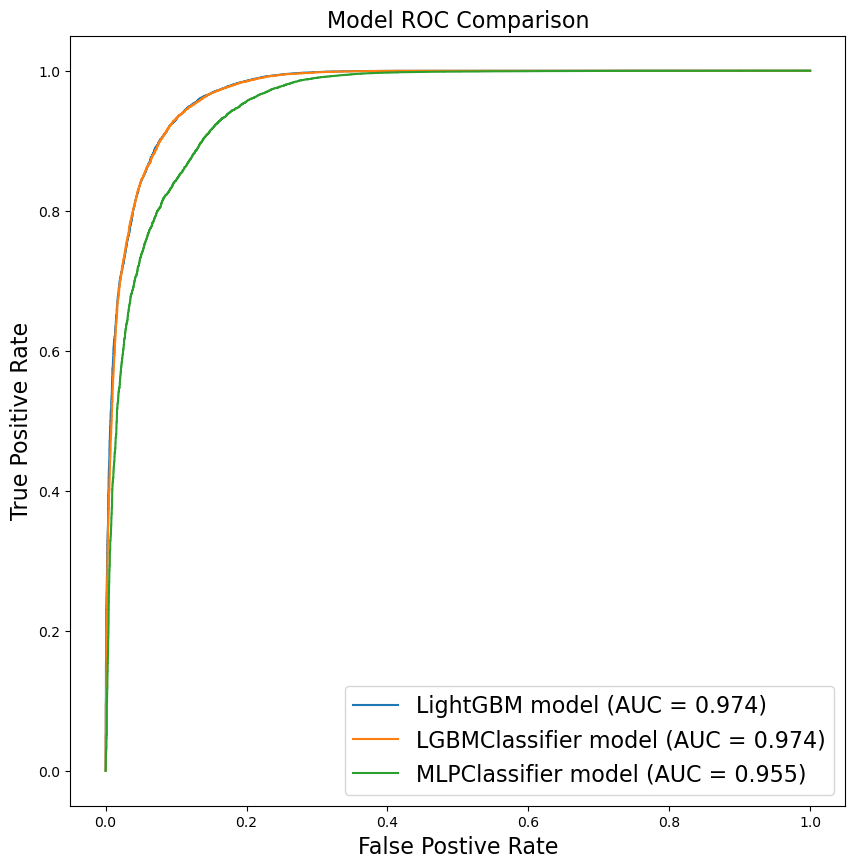

In [51]:
fpr, tpr, _ = roc_curve(truth_test, y_score)                  # False/True Positive Rate for our model
clf_score = pd.DataFrame(clf.predict_proba(input_test))
fprg, tprg, _ = roc_curve(truth_test, clf_score[1])
fprnn, tprnn, _ = roc_curve(truth_test, y_nn[1])
auc_score = auc(fpr,tpr)                        # This is the AUC score for our model
aucg_score = auc(fprg,tprg)
aucnn_score = auc(fprnn, tprnn)
fig = plt.figure(figsize = [10,10])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'LightGBM model (AUC = {auc_score:5.3f})')
plt.plot(fprg, tprg, label=f'LGBMClassifier model (AUC = {aucg_score:5.3f})')
plt.plot(fprnn, tprnn, label=f'MLPClassifier model (AUC = {aucnn_score:5.3f})')
#plt.plot(fpr_nnbjet, tpr_nnbjet, label = f'Aleph NNbjet (AUC = {auc_score_nnbjet:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.show()

# Dimensionality Reduction

In [18]:
def plot_pca(y_pcs, y):
    #=== plot PCA results
    fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
    #ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
    #ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

    # locate the points of each type in the original data
    # and paint them over the transformed data
    is_type1 = (y == 0)
    is_type2 = (y == 1)
    is_type3 = (y == 2)
    ax.scatter(y_pcs[is_type1, 0], y_pcs[is_type1, 1], 
               c='y', marker='s', label='Type 1')
    ax.scatter(y_pcs[is_type2, 0], y_pcs[is_type2, 1], 
               c='b', marker='o', label='Type 2')
    ax.scatter(y_pcs[is_type3, 0], y_pcs[is_type3, 1], 
               c='g', marker='^', label='Type 3')
    ax.legend()
    plt.show()
    return 

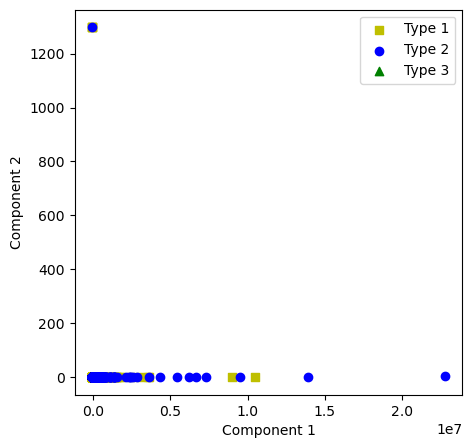

In [19]:
pca = PCA(n_components=2, svd_solver='full') # get a pca object of class PCA()
y_pcs = pca.fit_transform(input_train) # train pca object

# plot PCA results
plot_pca(y_pcs, truth_train)

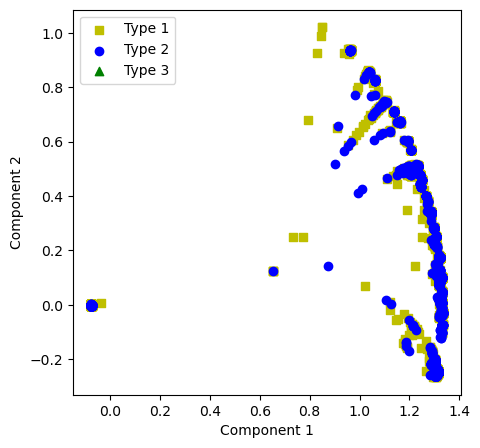

In [20]:
transform = preprocessing.Normalizer(norm='l2')
X_norm = transform.fit_transform(input_train)

# transform X_norm
y_pcs = pca.fit_transform(X_norm) # train pca object

# plot new PCA results
plot_pca(y_pcs, truth_train)

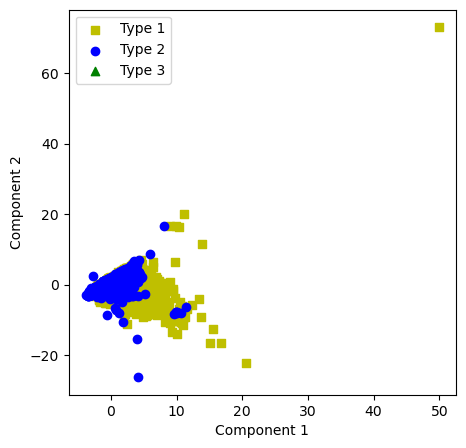

In [32]:
# standardize X
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(input_train)

# transform X_std
y_pcs = pca.fit_transform(X_std) # train pca object

# plot new PCA results
plot_pca(y_pcs, truth_train)

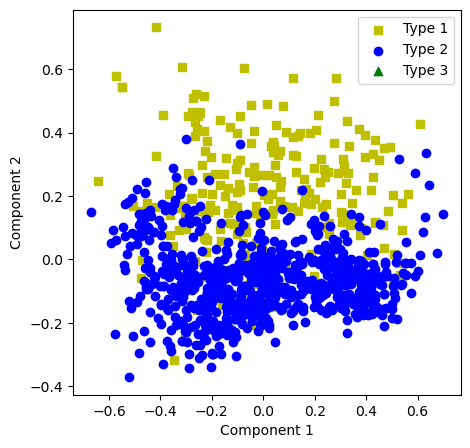

In [35]:
# standardize X
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X_train)

# transform X_std
kpca = KernelPCA(n_components=2, kernel='sigmoid')
y_pcs = kpca.fit_transform(X_std)

# plot new PCA results
plot_pca(y_pcs, y_train)


In [ ]:
fig, ax = plt.subplots(1, figsize=(4, 4), dpi=100)
ax.set_xlabel('log10( Variable values )')
ax.set_ylabel('Number')
ax.set_title('Normalized data')
xbins = np.arange(-3.2, 1.0, 0.4)

for i in range(X.shape[1]):
    x_pos = X_std[:, i][X_std[:, i] > 0.0]
    ax.hist(np.log10(x_pos), bins=xbins, histtype='step', label=f'Var {i}')

ax.legend(loc=2)
plt.show()

Performing Random Search CV to find the best parameters

In [59]:
parameters_RandomSearch = {'max_depth': poisson(25), 
                           'min_samples_leaf': randint(1, 100)}
warnings.filterwarnings("ignore")
n_iter_search = 9
RandomSearch = RandomizedSearchCV(clf, 
                                  param_distributions=parameters_RandomSearch, 
                                  n_iter=n_iter_search, 
                                  cv=5,
                                  verbose=-1,
                                  return_train_score=True,
                                  random_state=42,
                                 )

In [107]:
warnings.filterwarnings("ignore")
RandomSearch.fit(input_train, truth_train); #takes a long time to run!
RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.3f}")

Performing Permutation Importance to find the most important parameters (out of the 160 available)

In [114]:
from sklearn.inspection import permutation_importance

r = permutation_importance(clf, input_test, y=truth_test, n_repeats=30, random_state=12)  #takes a long time to run! 


In [134]:
#only to be run when using X_train instead of X_best (full list of variables)
#for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#        print(f"{i:<12}" f"{all_variables[i]:<48}"   f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")
        

0.03875999999999467
15          p_sigmad0                                       0.015 +/- 0.002
45          p_Reta                                          0.005 +/- 0.002
129         p_ptconecoreTrackPtrCorrection                  0.004 +/- 0.002
14          p_d0                                            0.003 +/- 0.001
53          p_deltaPhiRescaled2                             0.002 +/- 0.002
7           p_nTracks                                       0.002 +/- 0.001
57          p_numberOfPixelHits                             0.002 +/- 0.001
78          p_ambiguityType                                 0.002 +/- 0.001
134         p_weta1                                         0.001 +/- 0.001
84          p_deltaEta2                                     0.001 +/- 0.001
55          p_TRTTrackOccupancy                             0.001 +/- 0.001
82          p_core57cellsEnergyCorrection                   0.001 +/- 0.001
46          p_Rphi                                          0.001 +/

In [134]:
#code for cross checking the most important variables
#for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 and all_variables[i] in best_variables and i in bv:
#        print(f"{i:<12}" f"{all_variables[i]:<48}"   f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}    checked")
#    elif r.importances_mean[i] - 2 * r.importances_std[i] > 0  and i in bv2:
#        print(f"{i:<12}" f"{all_variables[i]:<48}"   f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}    *")
#    elif r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#        print(f"{i:<12}" f"{all_variables[i]:<48}"   f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")
        

In [133]:
#most important variables in this cut, from the list of best variables:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0: #if the error is large compared to the actual value importance, it is discounted
        print(f"{i:<12}" f"{best_variables[i]:<48}"   f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")

0           p_Rhad                                          0.091 +/- 0.004
2           p_sigmad0                                       0.030 +/- 0.003
6           p_deltaEta1                                     0.028 +/- 0.004
3           p_Reta                                          0.013 +/- 0.003
10          p_deltaPhiRescaled2                             0.011 +/- 0.002
1           p_ptconecoreTrackPtrCorrection                  0.007 +/- 0.002
4           p_numberOfPixelHits                             0.004 +/- 0.002
7           p_ambiguityType                                 0.003 +/- 0.001
5           p_numberOfInnermostPixelHits                    0.001 +/- 0.001
